In [22]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.3
⌃ [780c37f4] Carlo v0.2.4
  [a93c6f00] DataFrames v1.7.0
  [f67ccb44] HDF5 v0.17.2
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [23]:
using CairoMakie
using Carlo.ResultTools
using DataFrames
using HDF5
using LinearAlgebra

In [24]:
# Parse DataFrame from ResultTools into more readily useable form
cleandata(filepath::AbstractString) = select(
    DataFrame(ResultTools.dataframe(filepath)),
    [:T, :K, :Lx, :Ly, :Dxπ, :Dyπ, :P],
)

cleandata (generic function with 1 method)

In [25]:
function generatePlot(data::AbstractDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel, line=false, label="")
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    vals = getfield.(data[:, y], :val)
    errs = getfield.(data[:, y], :err)
    scatter!(data[:, x], vals; label)
    if line
        lines!(data[:, x], vals)
    end
    errorbars!(data[:, x], vals, errs)

    return fig
end

function generatePlot(data::GroupedDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel, line=false)
    fig = Figure()
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    for key in keys(data)
        group = data[key]
        vals = getfield.(group[:, y], :val)
        errs = getfield.(group[:, y], :err)
        scatter!(group[:, x], vals, label="$(NamedTuple(key))")
        if line
            lines!(group[:, x], vals)
        end
        errorbars!(group[:, x], vals, errs)
    end

    axislegend()

    return fig
end

generatePlot (generic function with 2 methods)

In [26]:
jobname = "small-sys"
data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,T,K,Lx,Ly,Dxπ,Dyπ,P
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…
1,0.01,-0.005,20,20,0.98941±0.00038,0.98941±0.00037,0.0459±0.0047
2,0.05,-0.005,20,20,0.9453±0.0017,0.9453±0.0017,0.109±0.01
3,0.1,-0.005,20,20,0.8738±0.0051,0.8737±0.0051,0.221±0.017
4,0.15,-0.005,20,20,0.8141±0.0067,0.814±0.0067,0.206±0.016
5,0.2,-0.005,20,20,0.677±0.023,0.677±0.023,0.345±0.029
6,0.25,-0.005,20,20,0.655±0.017,0.655±0.017,0.255±0.023
7,0.3,-0.005,20,20,0.517±0.04,0.517±0.04,0.347±0.032
8,0.35,-0.005,20,20,0.452±0.024,0.452±0.024,0.338±0.022
9,0.4,-0.005,20,20,0.379±0.024,0.379±0.024,0.343±0.017


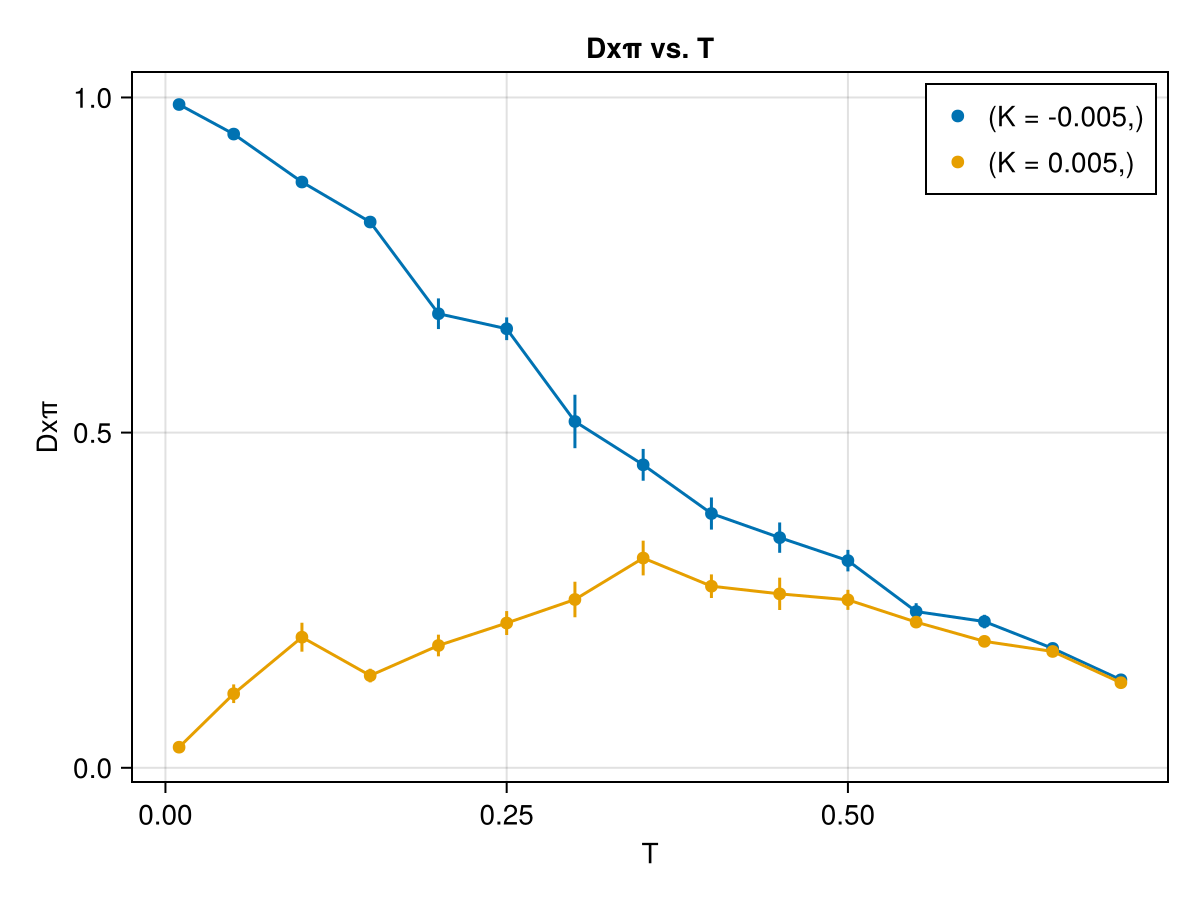

In [27]:
generatePlot(
    data, :T, :Dxπ;
    title="Dxπ vs. T",
    xlabel="T",
    ylabel="Dxπ",
    line=true
)

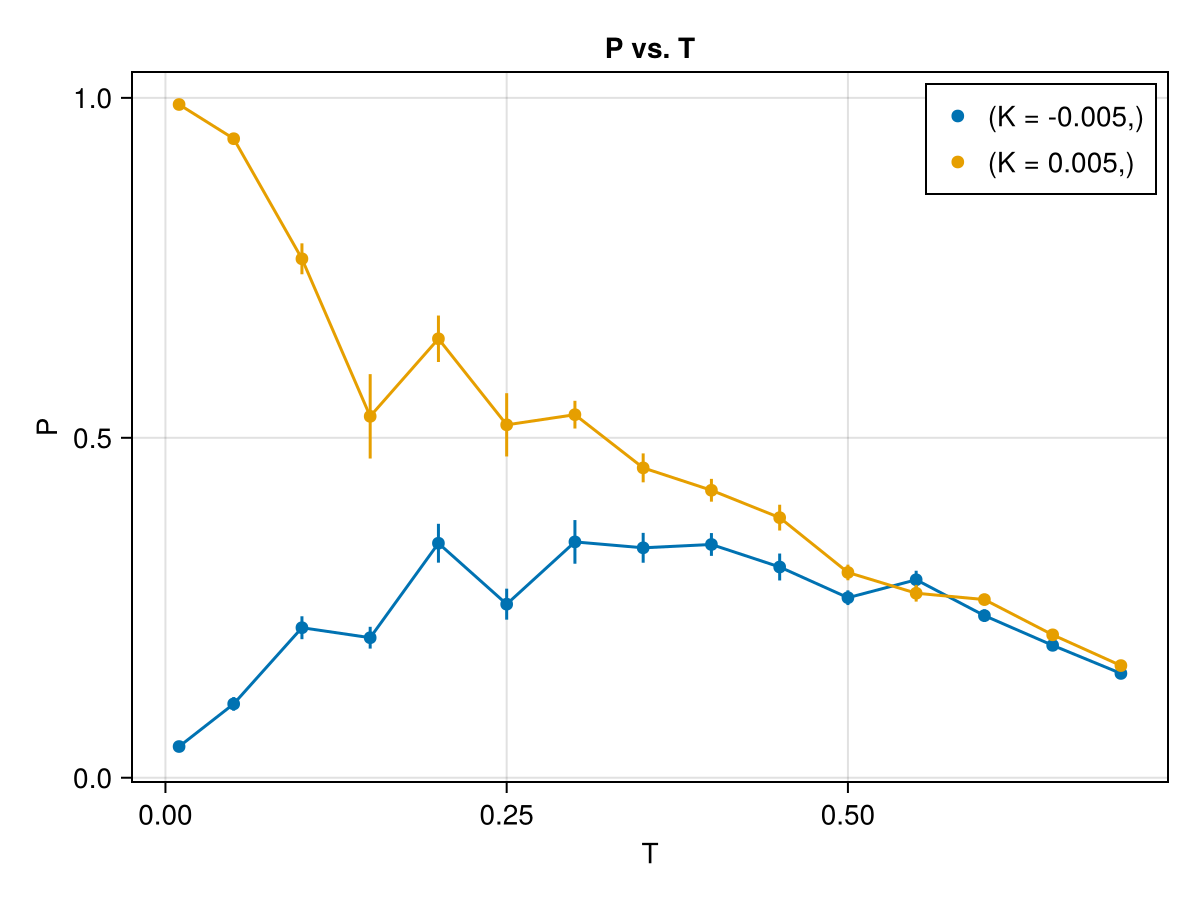

In [28]:
generatePlot(
    data, :T, :P;
    title="P vs. T",
    xlabel="T",
    ylabel="P",
    line=true
)

In [29]:
ungrouped_data = cleandata("../jobs/$jobname.results.json")

Row,T,K,Lx,Ly,Dxπ,Dyπ,P
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…
1,0.01,-0.005,20,20,0.98941±0.00038,0.98941±0.00037,0.0459±0.0047
2,0.05,-0.005,20,20,0.9453±0.0017,0.9453±0.0017,0.109±0.01
3,0.1,-0.005,20,20,0.8738±0.0051,0.8737±0.0051,0.221±0.017
4,0.15,-0.005,20,20,0.8141±0.0067,0.814±0.0067,0.206±0.016
5,0.2,-0.005,20,20,0.677±0.023,0.677±0.023,0.345±0.029
6,0.25,-0.005,20,20,0.655±0.017,0.655±0.017,0.255±0.023
7,0.3,-0.005,20,20,0.517±0.04,0.517±0.04,0.347±0.032
8,0.35,-0.005,20,20,0.452±0.024,0.452±0.024,0.338±0.022
9,0.4,-0.005,20,20,0.379±0.024,0.379±0.024,0.343±0.017


In [30]:
function generate_mctime_plot(task_no::Int)
    fig = Figure(size=(800, 400))

    ax_P = fig[1,1] = Axis(
        fig,
        title="P vs. Bin #",
        xlabel="Bin #",
        ylabel="P",
        xminorticksvisible=true
    )
    ax_Dxπ = fig[1,2] = Axis(
        fig,
        title="Dx(π) vs. Bin #",
        xlabel="Bin #",
        ylabel="Dx(π)",
        xminorticksvisible=true
    )

    task_str = lpad(task_no, 4, "0")
    h5open("../jobs/$jobname.data/task$task_str/run0001.meas.h5") do file
        observables = file["observables"]
        P_samples = read(observables, "P/samples")
        n = length(P_samples)
        init = 1
        lines!(
            ax_P,
            collect(init:n),
            P_samples[init:n],
        )
        Dxπ_samples = read(observables, "Dxπ/samples")
        lines!(
            ax_Dxπ,
            collect(init:n),
            Dxπ_samples[init:n],
        )
    end

    return fig
end

generate_mctime_plot (generic function with 1 method)

DataFrameRow
 Row │ T        K        Lx     Ly     Dxπ          Dyπ         P           
     │ Float64  Float64  Int64  Int64  Measurem…    Measurem…   Measurem…   
─────┼──────────────────────────────────────────────────────────────────────
  25 │    0.45    0.005     20     20  0.259±0.024  0.26±0.024  0.383±0.019

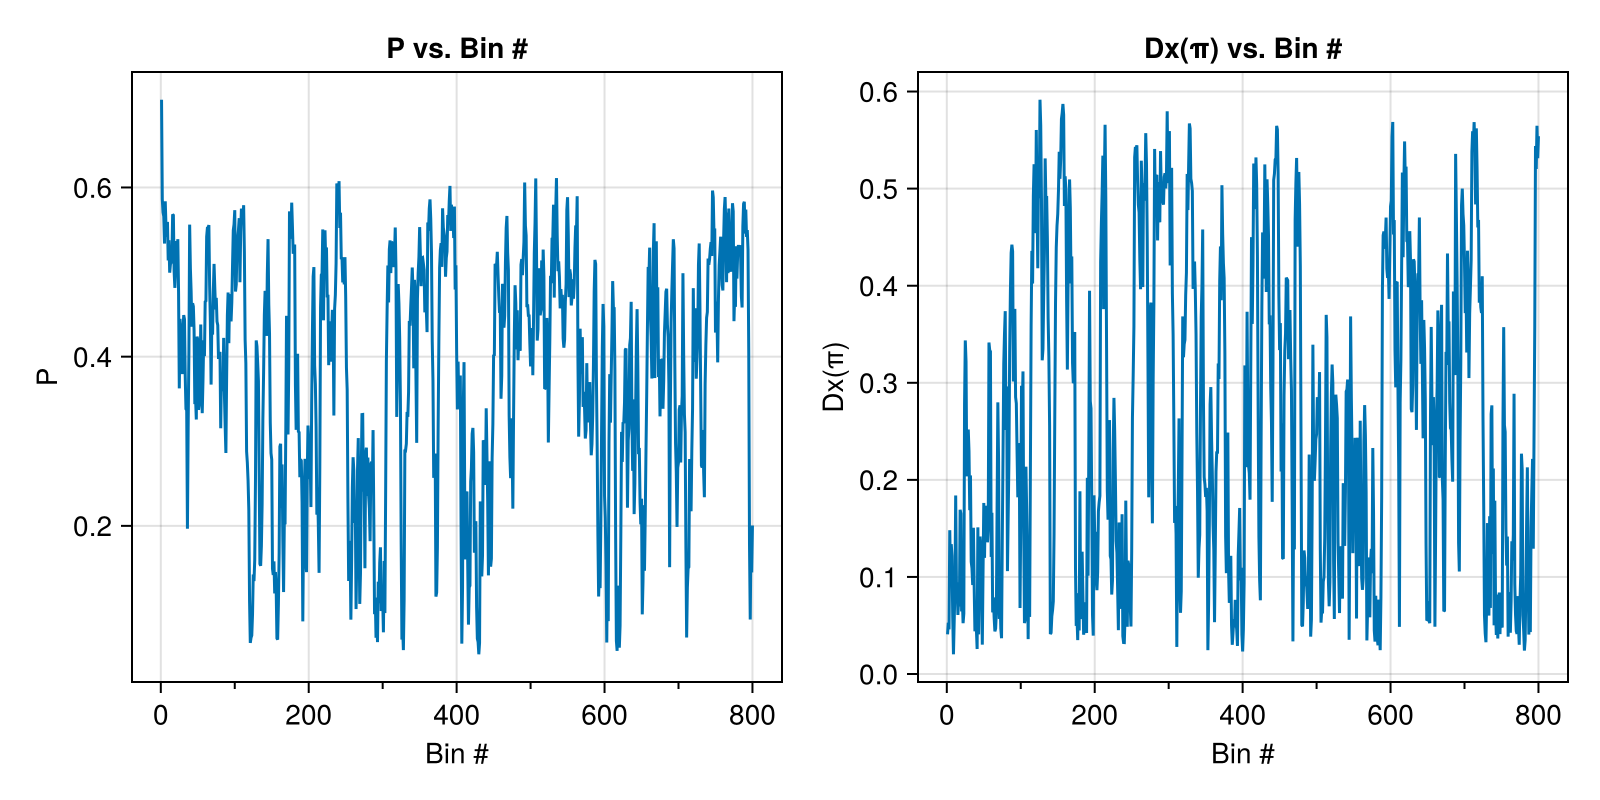

In [ ]:
i = 30
print(ungrouped_data[i, :])
generate_mctime_plot(i)

In [32]:
task_no = "21"
file = h5open("../jobs/" * jobname * ".data/task00" * task_no * "/run0001.dump.h5")
spins = map(
    t -> [t[:data][1], t[:data][2], t[:data][3]],
    read(file, "simulation/spins")
)
spin_xs = map(v -> v[1], spins)
spin_ys = map(v -> v[2], spins)
spin_zs = map(v -> v[3], spins)
Lx, Ly = size(spins)
close(file)

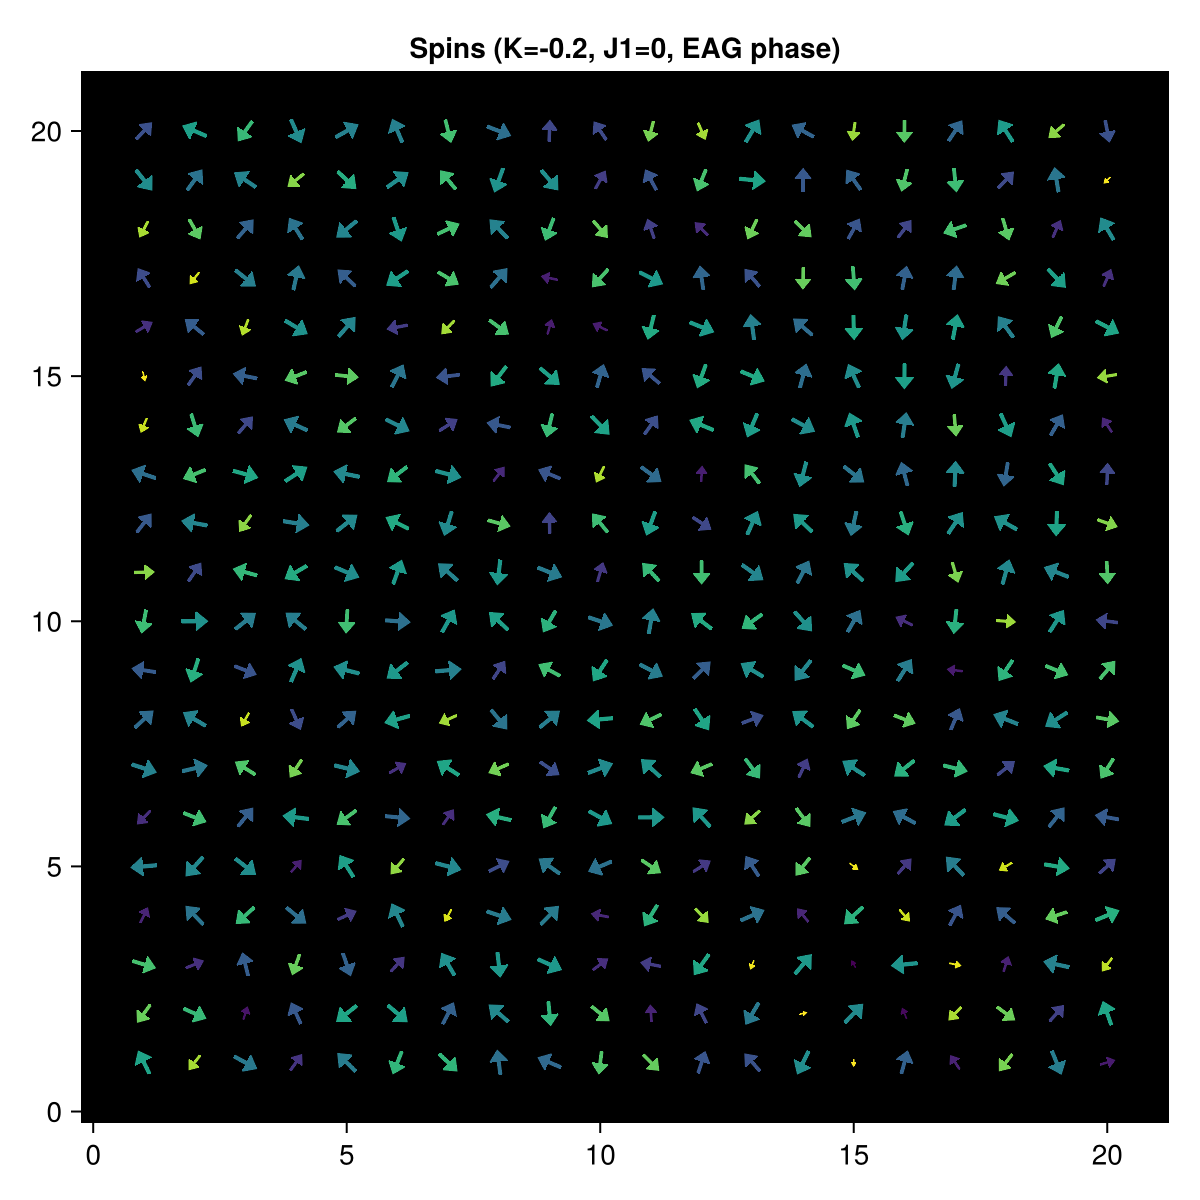

In [33]:
fig = Figure(size=(600, 600))
fig[1,1] = Axis(fig; title="Spins (K=-0.2, J1=0, EAG phase)", backgroundcolor="black")

strength = vec(spin_zs)
arrows2d!(1:Lx, 1:Ly, spin_xs, spin_ys, lengthscale=0.5, align=:center, color=strength)
fig